In [26]:
import matplotlib.pyplot as plt
import numpy as np

#Import PySwarms
import pyswarms as ps

#bayesian optimisation
from skopt import gp_minimize
from skopt import forest_minimize
from skopt import gbrt_minimize

#differential evolution
from scipy.optimize import differential_evolution

In [2]:
#create function for each colour addition:

def colour_mixing(col):
    """
    function that takes an array containing amount of r, g and b dye added and returns the colour
    maximum value of 100 for each amount
    """
    colour = np.array([1.0, 1.0, 1.0])
    colour -= (col[0]**2)/20000*np.array([0, 1, 1])
    colour -= (col[1]**2)/20000*np.array([1, 0, 1])
    colour -= (col[2]**2)/20000*np.array([1, 1, 0])
    return colour

[0.8  0.9  0.74]


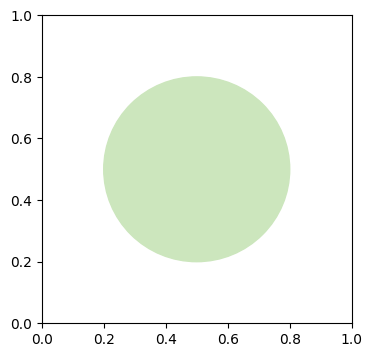

In [3]:
#set ideal colour
ideal = np.array([40, 60, 20])
fig, ax = plt.subplots(figsize = [4,4])
ax.add_artist(plt.Circle((0.5, 0.5), 0.3, color = colour_mixing(ideal)))
print(colour_mixing(ideal))

In [4]:
def func(col):
    j = ((col - ideal)**2).sum(axis = 1)
    return j

In [5]:
#PARTICLE SWARM

#3 dimensional swarm
#setting bounds
max_bound = 100 * np.ones(3)
min_bound = np.zeros(3)
bounds = (min_bound, max_bound)

#initialising swarm
options = {'c1': 0.3, 'c2': 0.9, 'w':0.1}

#Call instance of PSO with bounds argument
optimizer = ps.single.GlobalBestPSO(n_particles=12, dimensions=3, options=options, bounds=bounds)

#Perform optimization
cost, pos = optimizer.optimize(func, iters=8)

2025-01-05 11:47:26,998 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.3, 'c2': 0.9, 'w': 0.1}
pyswarms.single.global_best: 100%|██████████████████████████|8/8, best_cost=1.98
2025-01-05 11:47:27,210 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.9819993125675852, best pos: [40.14794521 59.50804222 18.68924103]


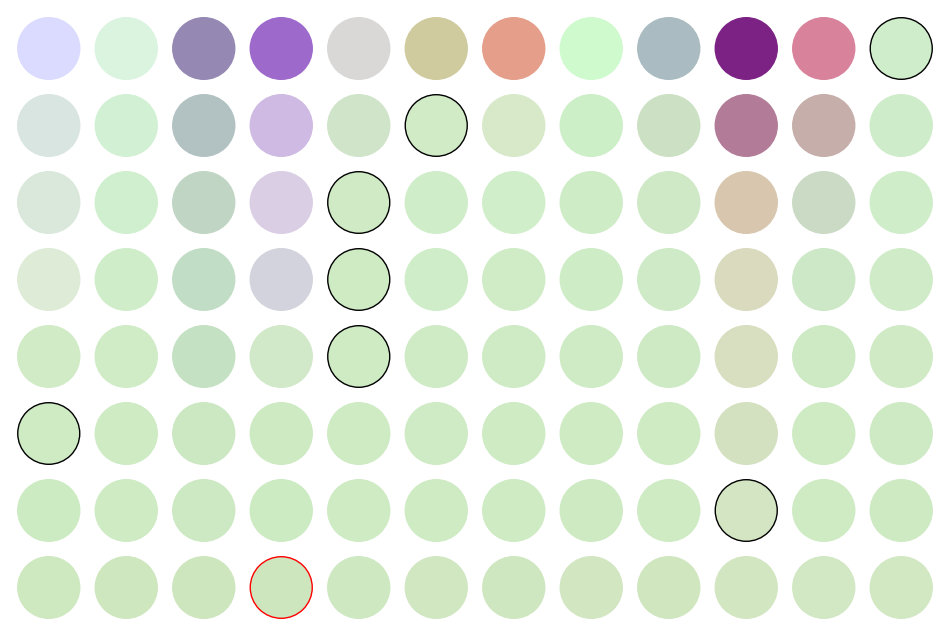

Best result was [40.14794521 59.50804222 18.68924103], actual result is [40 60 20]


In [15]:
#Parameters
num_circles = 96  # Total number of circles
cols = 12         # Number of columns (adjust as needed)
rows = num_circles / cols  # Number of rows


#array containing the values for each colour
vals = np.array(optimizer.pos_history)

circle_colours = []
for i in range(96):
    circle_colours.append(colour_mixing(vals.reshape(96, 3)[i]))
#circle_colors = colour_mix(vals.reshape(96, 3))

#calculate global and local best
global_best = np.argmin(np.sum(np.abs(vals.reshape(96, 3) - ideal), axis = 1))

local_best = []
for i, val in enumerate(vals):
    local_best.append(i*12 + np.argmin(np.sum(np.abs(val - ideal), axis = 1)))
    

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set axis limits and turn off axis
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.axis('off')

# Plot the circles
for i in range(num_circles):
    col = i % cols       # Determine the column index
    row = rows - (i // cols) -  1 #Determine the row index (invert to start from top)
    if i == global_best:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, facecolor = circle_colours[i], edgecolor = 'red')
    elif i in local_best:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, facecolor = circle_colours[i], edgecolor = 'black')
    else:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, color=circle_colours[i])
    ax.add_artist(circle)

# Show the plot
plt.show()

print(f'Best result is {pos}, actual result is {ideal}')

In [8]:
#BAYESIAN OPTIMISATION

#%%capture
#function for gp optimisation, sphere function
def gp_func(col):
    j = ((col - ideal)**2).sum()
    return j


res = gp_minimize(gp_func,
                  [(0.0, 100.0), (0.0, 100.0), (0.0, 100.0)],
                  n_calls = 96, 
                  n_random_starts = 12)

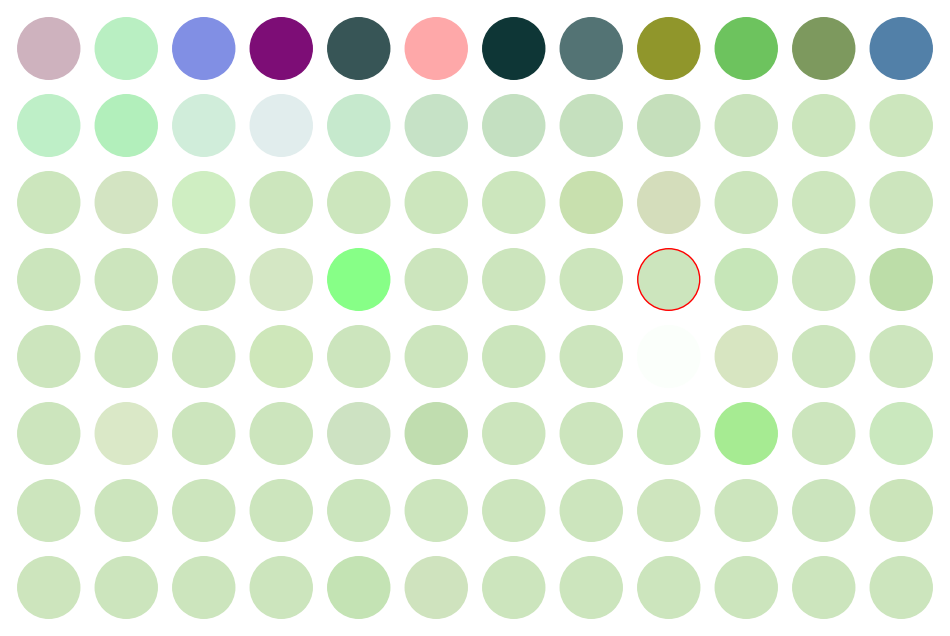

Best result was [40.01835304572843, 59.99300366304793, 19.980098306339276], actual result is [40 60 20]


In [17]:
#Parameters
num_circles = 96  # Total number of circles
cols = 12         # Number of columns (adjust as needed)
rows = num_circles / cols  # Number of rows


#array containing the values for each colour
vals = np.array(res.x_iters)

circle_colours = []
for i in range(96):
    circle_colours.append(colour_mixing(vals.reshape(96, 3)[i]))
#circle_colors = colour_mix(vals.reshape(96, 3))

#calculate global best
global_best = np.argmin(np.sum(np.abs(vals - ideal), axis = 1))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set axis limits and turn off axis
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.axis('off')

# Plot the circles
for i in range(num_circles):
    col = i % cols       # Determine the column index
    row = rows - (i // cols) -  1 #Determine the row index (invert to start from top)
    if i == global_best:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, facecolor = circle_colours[i], edgecolor = 'red')
    else:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, color=circle_colours[i])
    ax.add_artist(circle)

# Show the plot
plt.show()

print(f'Best result was {res.x}, actual result is {ideal}')

In [24]:

#forest optimisation
forest_res = forest_minimize(gp_func,
                  [(0.0, 100.0), (0.0, 100.0), (0.0, 100.0)],
                  n_calls = 96, 
                  n_initial_points = 12)

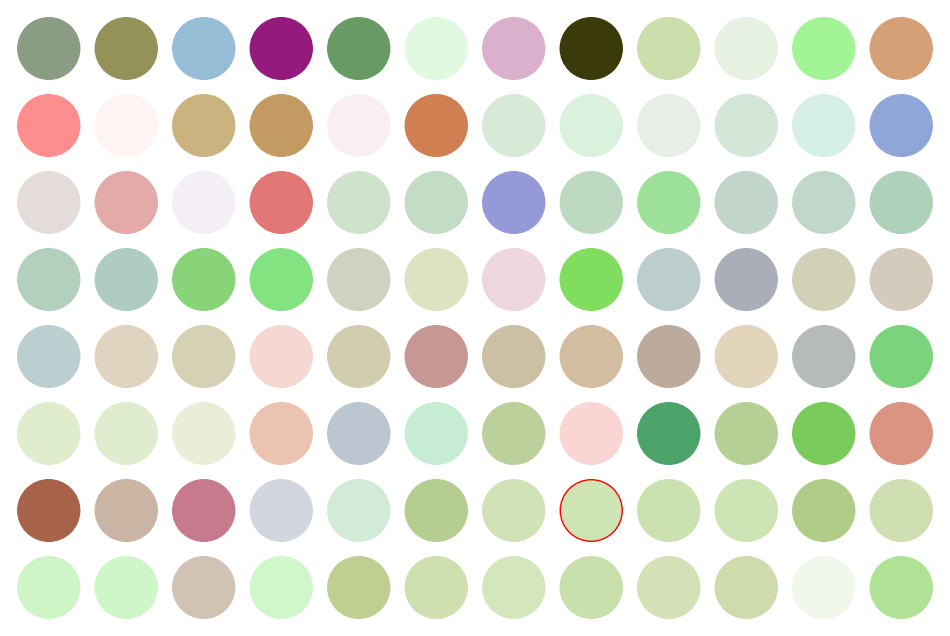

Best result was [45.40783159495028, 60.96959426914068, 8.4339568659347], actual result is [40 60 20]


In [25]:
#Parameters
num_circles = 96  # Total number of circles
cols = 12         # Number of columns (adjust as needed)
rows = num_circles / cols  # Number of rows

#array containing the values for each colour
vals = np.array(forest_res.x_iters)

circle_colours = []
for i in range(96):
    circle_colours.append(colour_mixing(vals.reshape(96, 3)[i]))
#circle_colors = colour_mix(vals.reshape(96, 3))

#calculate global best
global_best = np.argmin(np.sum(np.abs(vals - ideal), axis = 1))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set axis limits and turn off axis
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.axis('off')

# Plot the circles
for i in range(num_circles):
    col = i % cols       # Determine the column index
    row = rows - (i // cols) -  1 #Determine the row index (invert to start from top)
    if i == global_best:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, facecolor = circle_colours[i], edgecolor = 'red')
    else:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, color=circle_colours[i])
    ax.add_artist(circle)

# Show the plot
plt.show()

print(f'Best result was {forest_res.x}, actual result is {ideal}')

In [53]:
#DIFFERENTIAL EVOLUTION

result = []
def callbackF(Xi, x):
    result.append(Xi)

diff_ev = differential_evolution(gp_func,
                                 [(0.0, 100.0), (0.0, 100.0), (0.0, 100.0)],
                                 maxiter = 8,
                                 popsize = 12,
                                     callback = callbackF)

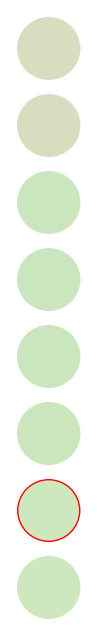

Best result was [40.         59.99999999 20.        ], actual result is [40 60 20]


In [54]:
#Parameters
num_circles = 8  # Total number of circles
cols = 1         # Number of columns (adjust as needed)
rows = num_circles / cols  # Number of rows

#array containing the values for each colour
vals = np.array(result)

circle_colours = []
for i in range(num_circles):
    circle_colours.append(colour_mixing(vals[i]))
#circle_colors = colour_mix(vals.reshape(96, 3))

#calculate global best
global_best = np.argmin(np.sum(np.abs(vals - ideal), axis = 1))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1, 8))

# Set axis limits and turn off axis
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.axis('off')

# Plot the circles
for i in range(num_circles):
    col = i % cols       # Determine the column index
    row = rows - (i // cols) -  1 #Determine the row index (invert to start from top)
    if i == global_best:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, facecolor = circle_colours[i], edgecolor = 'red')
    else:
        circle = plt.Circle((col + 0.5, row + 0.5), 0.4, color=circle_colours[i])
    ax.add_artist(circle)

# Show the plot
plt.show()

print(f'Best result was {diff_ev.x}, actual result is {ideal}')